<a href="https://colab.research.google.com/github/LathaGovindarajan/Machine-Learning/blob/main/LogisticRegression%20using%20train_valid_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
train=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train new.csv")

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [12]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

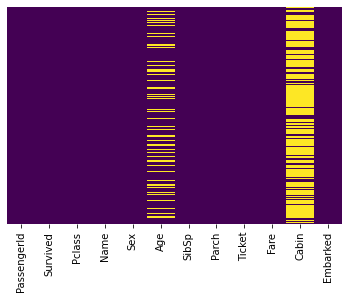

In [13]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

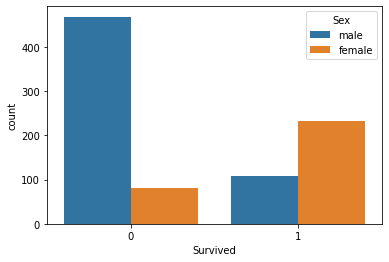

In [14]:
sns.countplot(x='Survived',data=train,hue='Sex')

male survived in higher percentage

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age'>

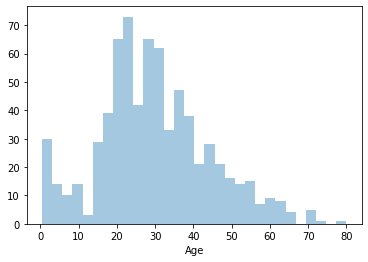

In [15]:
sns.distplot(train['Age'].dropna(),kde=False,bins=30)

no age grp mising

In [16]:
def impute_age(cols):
    Age=cols[0]
    pclass=cols[1]
    if pd.isnull(Age):
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        else:
            return 24
    else:
        return Age

In [17]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [18]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
train.drop('Cabin',axis=1,inplace=True)

In [20]:
train.dropna(inplace=True)

one hot encoding or dummies to convert categorical data into numeric

In [21]:
gender=pd.get_dummies(train['Sex'],drop_first=True)

In [22]:
gender

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [23]:
embark=pd.get_dummies(train['Embarked'],drop_first=True)

In [24]:
embark

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [25]:
train=pd.concat([train,gender,embark],axis=1)

In [26]:
train.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [27]:
x=train.drop('Survived',axis=1)
y=train['Survived']

In [28]:
x.shape

(889, 8)

In [29]:
y.shape

(889,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [32]:
from sklearn.model_selection import train_test_split
x_train,x_valid_test,y_train,y_valid_test=train_test_split(x,y,test_size=0.3)

In [34]:
from sklearn.model_selection import train_test_split
x_valid,x_test,y_valid,y_test=train_test_split(x_valid_test,y_valid_test,test_size=0.5)

In [35]:
#build the model and then fit the model for training
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

In [37]:
print(len(x_train),len(x_valid),len(x_test))

622 133 134


In [39]:
model.fit(x_train,y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [41]:
prediction=model.predict(x_test)

In [42]:
prediction

array([0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 1])

In [43]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report")

Classification Report


In [44]:
print(classification_report(y_test,prediction))
print("Confusion Matrix")
print(confusion_matrix,y_test,prediction)

              precision    recall  f1-score   support

           0       0.84      0.85      0.85        89
           1       0.70      0.69      0.70        45

    accuracy                           0.80       134
   macro avg       0.77      0.77      0.77       134
weighted avg       0.80      0.80      0.80       134

Confusion Matrix
<function confusion_matrix at 0x7f0a7a3370d0> 76     0
496    1
853    1
248    1
379    0
      ..
652    0
75     0
727    1
606    0
23     1
Name: Survived, Length: 134, dtype: int64 [0 1 1 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1
 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1]


In [45]:
model.fit(x_valid,y_valid)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
prediction=model.predict(x_valid_test)

In [48]:
prediction

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0])

In [49]:
from sklearn.metrics import classification_report,confusion_matrix
print("Classification Report")

Classification Report


In [54]:
print(classification_report(y_valid_test,prediction))
print("Confusion Matrix")
print(confusion_matrix,y_valid_test,prediction)

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       166
           1       0.72      0.70      0.71       101

    accuracy                           0.79       267
   macro avg       0.77      0.77      0.77       267
weighted avg       0.79      0.79      0.79       267

Confusion Matrix
<function confusion_matrix at 0x7f0a7a3370d0> 187    1
380    1
824    0
46     0
277    0
      ..
290    1
456    0
882    0
569    1
406    0
Name: Survived, Length: 267, dtype: int64 [0 1 0 0 0 0 1 1 0 1 0 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 1 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 0
 0 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 0
 0 1 1 0 0 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0
 1 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 1 1 0 1 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 0 0 1 1 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 